# Statistical exploration for Bayesian analysis of PhIP-seq

In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [49]:
cpm = pd.read_csv('/Users/laserson/tmp/phip_analysis/phip-9/cpm.tsv', sep='\t', header=0, index_col=0)

In [50]:
upper_bound = sp.stats.scoreatpercentile(cpm.values.ravel(), 99.9)
upper_bound

216.40100000053644

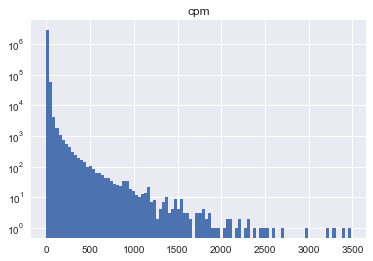

In [51]:
fig, ax = plt.subplots()
_ = ax.hist(cpm.values.ravel(), bins=100, log=True)
_ = ax.set(title='cpm')

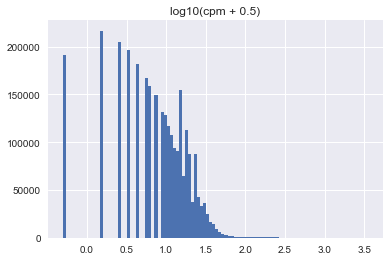

In [52]:
fig, ax = plt.subplots()
_ = ax.hist(np.log10(cpm.values.ravel() + 0.5), bins=100, log=False)
_ = ax.set(title='log10(cpm + 0.5)')

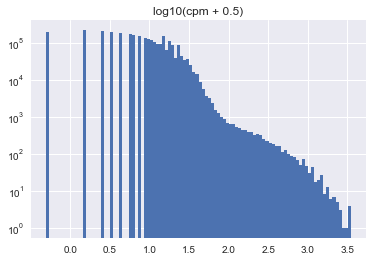

In [53]:
fig, ax = plt.subplots()
_ = ax.hist(np.log10(cpm.values.ravel() + 0.5), bins=100, log=True)
_ = ax.set(title='log10(cpm + 0.5)')

Plot only the lowest 99.9% of the data

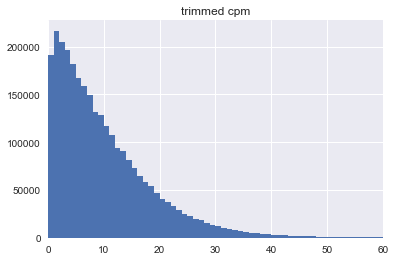

In [54]:
fig, ax = plt.subplots()
_ = ax.hist(cpm.values.ravel()[cpm.values.ravel() <= upper_bound], bins=range(100), log=False)
_ = ax.set(xlim=(0, 60))
_ = ax.set(title='trimmed cpm')

In [55]:
trimmed_cpm = cpm.values.ravel()[cpm.values.ravel() <= upper_bound]
trimmed_cpm.mean(), trimmed_cpm.std()

(9.9421241108113403, 10.678173577708357)

In [56]:
means = cpm.apply(lambda x: x[x <= upper_bound].mean(), axis=1, raw=True)
_, edges = np.histogram(means, bins=[sp.stats.scoreatpercentile(means, p) for p in np.linspace(0, 100, 10)])

In [57]:
def plot_hist(ax, a):
    h, e = np.histogram(a, bins=100, range=(0, upper_bound), density=True)
    ax.hlines(h, e[:-1], e[1:])

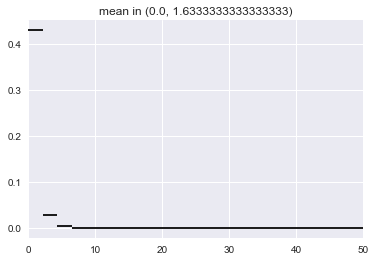

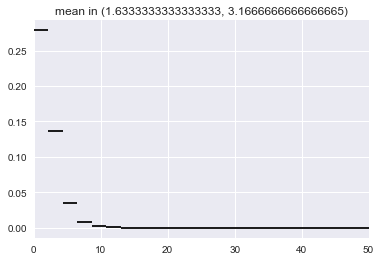

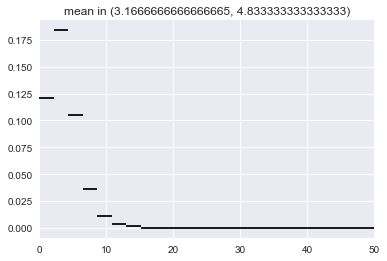

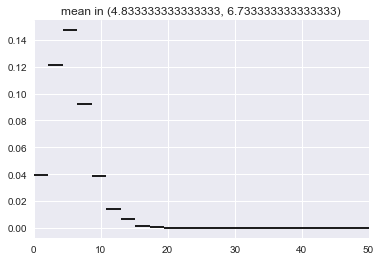

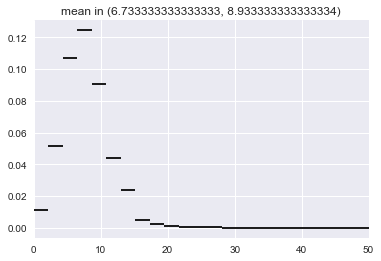

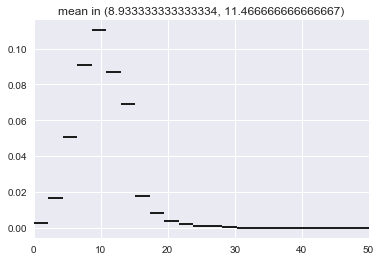

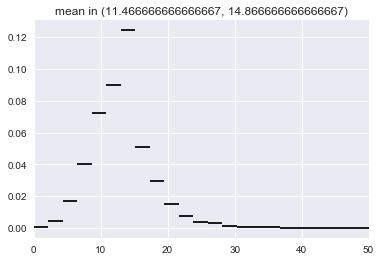

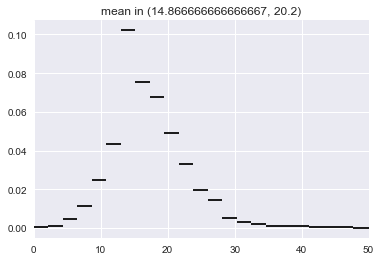

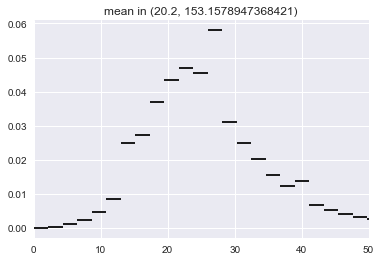

In [58]:
for i in range(len(edges[:-1])):
    left = edges[i]
    right = edges[i + 1]
    rows = (means >= left) & (means <= right)
    values = cpm[rows].values.ravel()
    fig, ax = plt.subplots()
    plot_hist(ax, values)
    ax.set(xlim=(0, 50), title='mean in ({}, {})'.format(left, right))

Do the slices look Poisson?

[(0, 50)]

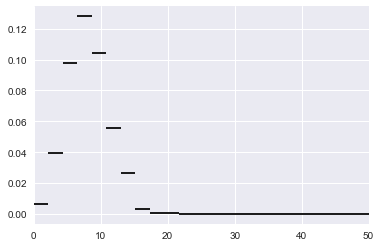

In [59]:
a = np.random.poisson(8, 10000)
fig, ax = plt.subplots()
plot_hist(ax, a)
ax.set(xlim=(0, 50))

For the most part.  Maybe try NegBin just in case

What does the distribution of the trimmed means look like?

[(0, 50)]

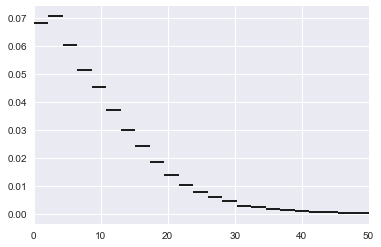

In [60]:
fig, ax = plt.subplots()
plot_hist(ax, means)
ax.set(xlim=(0, 50))

[(0, 50)]

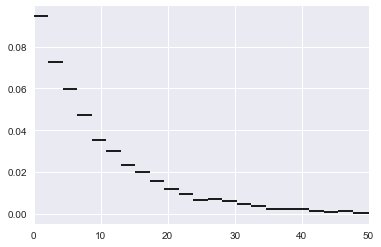

In [61]:
a = np.random.gamma(1, 10, 10000)
fig, ax = plt.subplots()
plot_hist(ax, a)
ax.set(xlim=(0, 50))

In [62]:
means.mean()

9.9956446041530818

Following Anders and Huber, _Genome Biology_ 2010, compute some of their stats

Compute size factors

In [63]:
s = np.exp(np.median(np.log(cpm.values + 0.5) - np.log(cpm.values + 0.5).mean(axis=1).reshape((cpm.shape[0], 1)), axis=0))

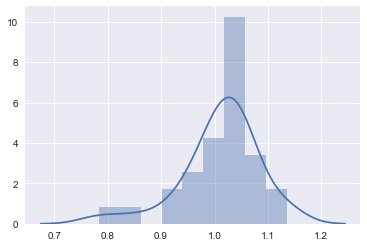

In [64]:
_ = sns.distplot(s)

In [65]:
q = (cpm.values / s).mean(axis=1)

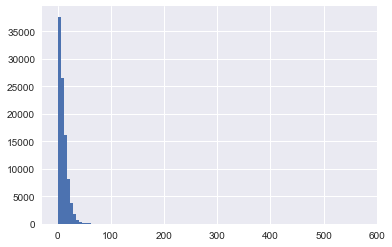

In [66]:
fig, ax = plt.subplots()
_ = ax.hist(q, bins=100, log=False)

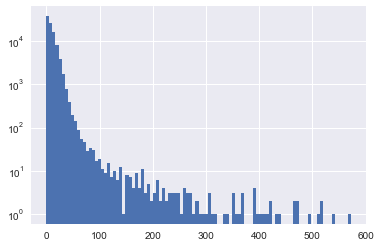

In [67]:
fig, ax = plt.subplots()
_ = ax.hist(q, bins=100, log=True)

In [68]:
w = (cpm.values / s).std(axis=1, ddof=1)

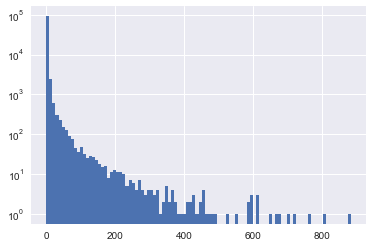

In [69]:
fig, ax = plt.subplots()
_ = ax.hist(w, bins=100, log=True)

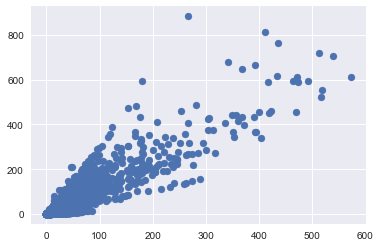

In [70]:
fig, ax = plt.subplots()
_ = ax.scatter(q, w)

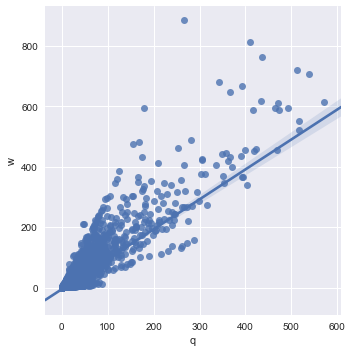

In [71]:
_ = sns.lmplot('q', 'w', pd.DataFrame({'q': q, 'w': w}))

In [72]:
list(zip(cpm.values.sum(axis=0), s))

[(1000591, 1.0681541323525534),
 (1001638, 1.046902937707179),
 (999815, 1.066070286402355),
 (997969, 1.0917607741142121),
 (997840, 1.0247851225291942),
 (998945, 1.0199611261078056),
 (999577, 0.99621509171980727),
 (1001162, 1.025592027289312),
 (999519, 1.1350877645317199),
 (999587, 1.1327429552036481),
 (999621, 1.0546279311372166),
 (999933, 1.0029357955852236),
 (999804, 1.0421606036812807),
 (999881, 0.98966897038013824),
 (999389, 0.91421867150309533),
 (1000097, 0.99979615102339625),
 (999818, 0.78370907263862766),
 (999700, 0.85051419640847536),
 (999705, 0.98316967031036961),
 (1003117, 0.96404200697356024),
 (999050, 0.92937699120961048),
 (999953, 0.97246453244842612),
 (999781, 1.0353438144903941),
 (1000229, 1.0598066140667766),
 (999719, 1.0560840170428636),
 (1000104, 1.0283736153248682),
 (1000017, 1.035337328176245),
 (999762, 1.022102156668877),
 (999626, 1.0220481626843567),
 (999791, 0.96205352272587308)]

In [73]:
s

array([ 1.06815413,  1.04690294,  1.06607029,  1.09176077,  1.02478512,
        1.01996113,  0.99621509,  1.02559203,  1.13508776,  1.13274296,
        1.05462793,  1.0029358 ,  1.0421606 ,  0.98966897,  0.91421867,
        0.99979615,  0.78370907,  0.8505142 ,  0.98316967,  0.96404201,
        0.92937699,  0.97246453,  1.03534381,  1.05980661,  1.05608402,
        1.02837362,  1.03533733,  1.02210216,  1.02204816,  0.96205352])

In [74]:
a = np.random.gamma(30, 1/30, 1000)

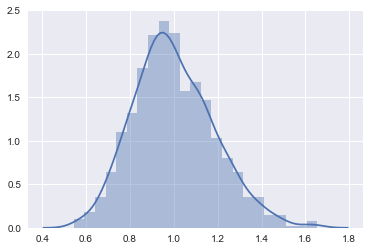

In [75]:
sns.distplot(a)

Proceeding with the following strategy/model

Trim data to remove top 0.1% of count values.  Compute mean of each row and use the means to fit a gamma distribution.  Using these values, define a posterior on a rate for each clone, assuming Poisson stats for each cell.  This means the posterior is also gamma distributed.  Then compute the probability of seeing a more extreme value, weighted with the posterior on r_i.

In [76]:
import pystan

In [4]:
cpm = pd.read_csv('/Users/laserson/tmp/phip_analysis/phip-9/cpm.tsv', sep='\t', header=0, index_col=0)

In [5]:
upper_bound = sp.stats.scoreatpercentile(cpm.values, 99.9)

In [6]:
trimmed_means = cpm.apply(lambda x: x[x <= upper_bound].mean(), axis=1, raw=True).values

In [80]:
brm = pystan.StanModel(model_name='background_rates', file='/Users/laserson/repos/bamophip/background_rates.stan')

INFO:pystan:COMPILING THE C++ CODE FOR MODEL background_rates_0a7b2d07f26077b0d278330f6aedefc9 NOW.


In [81]:
data = {
    'num_clones': trimmed_means.shape[0],
    'trimmed_means': trimmed_means
}
br_fit = brm.sampling(data=data, iter=2000, chains=4)

In [82]:
br_fit

Inference for Stan model: background_rates_0a7b2d07f26077b0d278330f6aedefc9.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
g_alpha   1.26  1.4e-4 5.1e-3   1.25   1.25   1.26   1.26   1.27   1352    1.0
g_beta    0.13  1.7e-5 6.2e-4   0.12   0.13   0.13   0.13   0.13   1338    nan
lp__    -3.2e5    0.03    1.0 -3.2e5 -3.2e5 -3.2e5 -3.2e5 -3.2e5   1158   1.01

Samples were drawn using NUTS at Fri Jul 21 14:55:59 2017.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

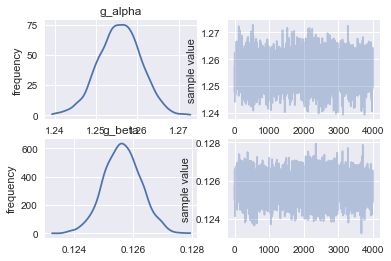

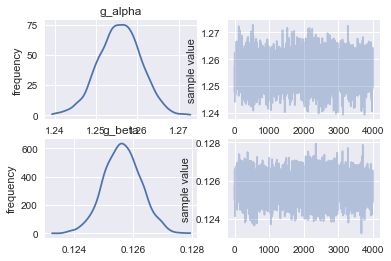

In [83]:
br_fit.plot()

In [84]:
alpha, beta, _ = br_fit.get_posterior_mean().mean(axis=1)

In [85]:
alpha, beta

(1.2557251897737052, 0.12563033692488237)

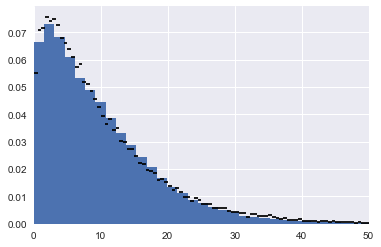

In [119]:
h, e = np.histogram(np.random.gamma(alpha, 1 / beta, 50000), bins='auto', density=True)
fig, ax = plt.subplots()
_ = ax.hist(trimmed_means, bins=100, normed=True)
_ = ax.hlines(h, e[:-1], e[1:])
_ = ax.set(xlim=(0, 50))

In [86]:
# assumes the counts for each clone are Poisson distributed with the learned Gamma prior
# Therefore, the posterior is Gamma distributed, and we use the expression for its expected value
trimmed_sums = cpm.apply(lambda x: x[x <= upper_bound].sum(), axis=1, raw=True).values
trimmed_sizes = cpm.apply(lambda x: (x <= upper_bound).sum(), axis=1, raw=True).values
background_rates = (alpha + trimmed_sums) / (beta + trimmed_sizes)

In [88]:
# mlxp is "minus log 10 pval"
mlxp = []
for i in range(cpm.shape[0]):
    mlxp.append(-sp.stats.poisson.logsf(cpm.values[i], background_rates[i]) / np.log(10))
mlxp = np.asarray(mlxp)

/Users/laserson/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:899: RuntimeWarning: divide by zero encountered in log
  return log(self._sf(x, *args))


[(0, 1)]

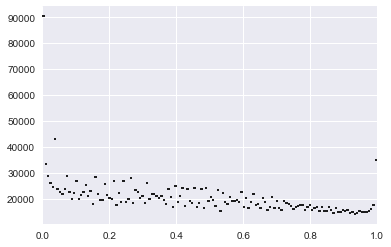

In [89]:
fig, ax = plt.subplots()
h, e = np.histogram(10**(-mlxp.ravel()), bins='auto')
ax.hlines(h, e[:-1], e[1:])
ax.set(xlim=(0, 1))

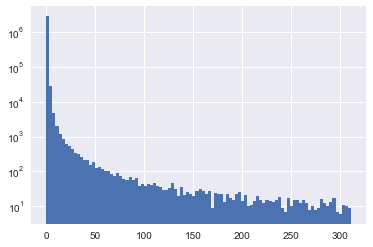

In [95]:
fig, ax = plt.subplots()
finite = np.isfinite(mlxp.ravel())
_ = ax.hist(mlxp.ravel()[finite], bins=100, log=True)

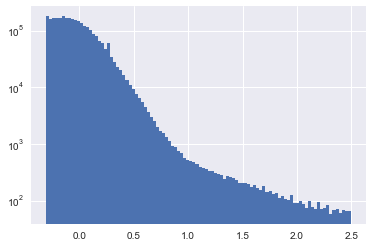

In [98]:
fig, ax = plt.subplots()
finite = np.isfinite(mlxp.ravel())
_ = ax.hist(np.log10(mlxp.ravel()[finite] + 0.5), bins=100, log=True)

In [99]:
old_pvals = pd.read_csv('/Users/laserson/tmp/phip_analysis/phip-9/pvals.tsv', sep='\t', header=0, index_col=0)

[(0, 1)]

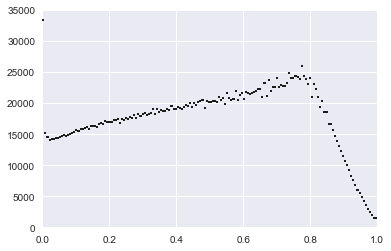

In [100]:
fig, ax = plt.subplots()
h, e = np.histogram(10**(-old_pvals.values.ravel()), bins='auto')
ax.hlines(h, e[:-1], e[1:])
ax.set(xlim=(0, 1))

In [101]:
(old_pvals.values.ravel() > 10).sum()

4294

In [102]:
(mlxp > 10).sum()

10220

In [103]:
len(mlxp.ravel())

2883600

Can we use scipy's MLE for the gamma parameters instead?

In [105]:
sp.stats.gamma.fit(trimmed_means)

(0.33870375867684477, -3.5950824315037392e-25, 3.1021876347022337)

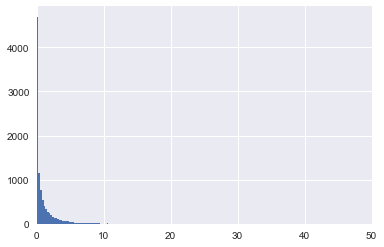

In [113]:
fig, ax = plt.subplots()
_ = ax.hist(sp.stats.gamma.rvs(a=0.3387, loc=0, scale=3.102, size=10000), bins=100)
_ = ax.set(xlim=(0, 50))

Hmmm...doesn't appear to get the correct solution.

Alternatively, let's try optimizing the log likelihood ourselves

In [27]:
pos = trimmed_means > 0
n = len(trimmed_means)
s = trimmed_means[pos].sum()
sl = np.log(trimmed_means[pos]).sum()
def ll(x):
    return -1 * (n * x[0] * np.log(x[1]) - n * sp.special.gammaln(x[0]) + (x[0] - 1) * sl - x[1] * s)

In [34]:
param = sp.optimize.minimize(ll, np.asarray([2, 1]), bounds=[(np.nextafter(0, 1), None), (np.nextafter(0, 1), None)])
param

      fun: 315946.1251649895
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.       , -0.0349246])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 54
      nit: 12
   status: 0
  success: True
        x: array([ 1.25600681,  0.1256554 ])

In [38]:
param.x

array([ 1.25600681,  0.1256554 ])

SUCCESS!

Do the p-values have a correlation with the peptide abundance?

In [42]:
mlxp = pd.read_csv('/Users/laserson/tmp/phip_analysis/sjogrens/mlxp.tsv', sep='\t', index_col=0, header=0)
inputs = pd.read_csv('/Users/laserson/repos/phage_libraries_private/human90/inputs/human90-larman1-input.tsv', sep='\t', index_col=0, header=0)

In [53]:
m = pd.merge(mlxp, inputs, left_index=True, right_index=True)

In [59]:
sample = 'Sjogrens.serum.Sjogrens.FS12-03967.20A20G.1'

In [60]:
sp.stats.pearsonr(10**(-m[sample]), m['input'])

(0.20887705868459297, 0.0)

In [61]:
sp.stats.spearmanr(10**(-m[sample]), m['input'])

SpearmanrResult(correlation=0.36650172649526896, pvalue=0.0)

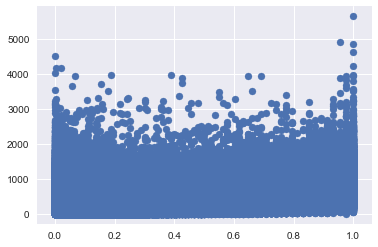

In [62]:
fig, ax = plt.subplots()
_ = ax.scatter(10**(-m[sample]), m['input'])

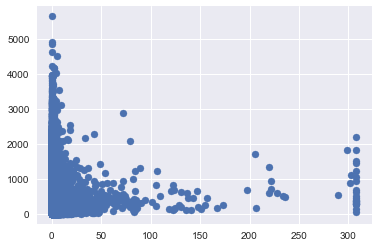

In [63]:
fig, ax = plt.subplots()
_ = ax.scatter(m[sample], m['input'])

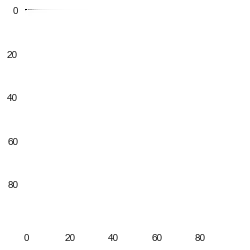

In [68]:
h, xe, ye = np.histogram2d(m[sample], m['input'], bins=100)
fig, ax = plt.subplots()
_ = ax.imshow(h)

In [67]:
np.histogram2d